In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


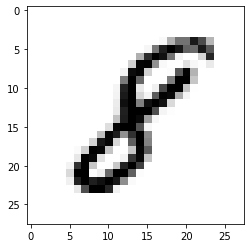

In [4]:
image_index = 7777
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

In [6]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255
print('train_images shape:', train_images.shape)
print('Number of images in train_images', train_images.shape[0])
print('Number of images in test_images', test_images.shape[0])

train_images shape: (60000, 28, 28, 1)
Number of images in train_images 60000
Number of images in test_images 10000


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        16192     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
MCNN = model.fit(train_images, train_labels, epochs=10,
                   validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.1434 - acc: 0.9563 - val_loss: 0.0441 - val_acc: 0.9859
Epoch 2/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0442 - acc: 0.9865 - val_loss: 0.0425 - val_acc: 0.9863
Epoch 3/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0329 - acc: 0.9896 - val_loss: 0.0285 - val_acc: 0.9907
Epoch 4/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0249 - acc: 0.9919 - val_loss: 0.0336 - val_acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.0191 - acc: 0.9939 - val_loss: 0.0288 - val_acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0153 - acc: 0.9951 - val_loss: 0.0309 - val_acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0129 - acc: 0.9959 - val_loss: 0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


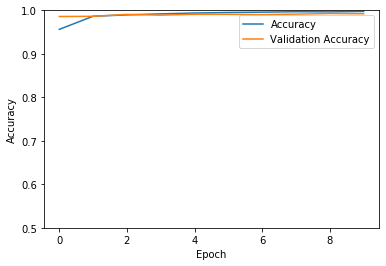

In [15]:
plt.plot(MCNN.history['acc'], label='Accuracy')
plt.plot(MCNN.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower_right')
plt.show()

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 3s - loss: 0.0347 - acc: 0.9922


In [17]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

Test Loss:  0.034710102244432064
Test Accuracy:  0.9922
